<a href="https://colab.research.google.com/github/Sohni-Arunima/CODSOFT/blob/main/iris_flower_classification_codsoft_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK-2 : IRIS FLOWER CLASSIFICATION**



1.   Author: Maroju Sohni Arunima

2.   Batch: February-2025

3.   Domain: Data Science

4.   Aim: Build a model that can classify iris flowers into different species based on their sepal and petal measurements.




In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df['species'],categories=pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


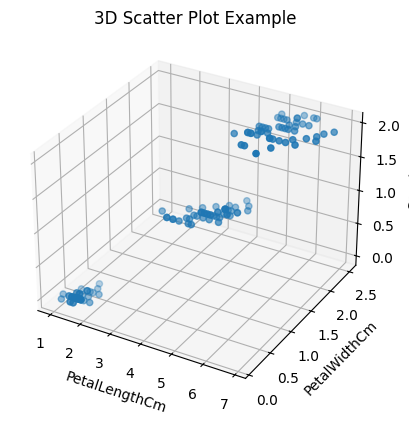

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.petal_length,df.petal_width,df.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

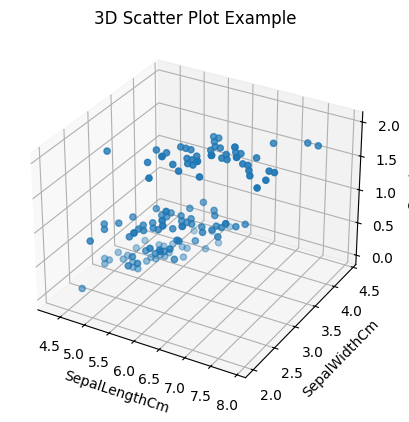

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.sepal_length,df.sepal_width,df.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D Scatter Plot Example')
plt.show()

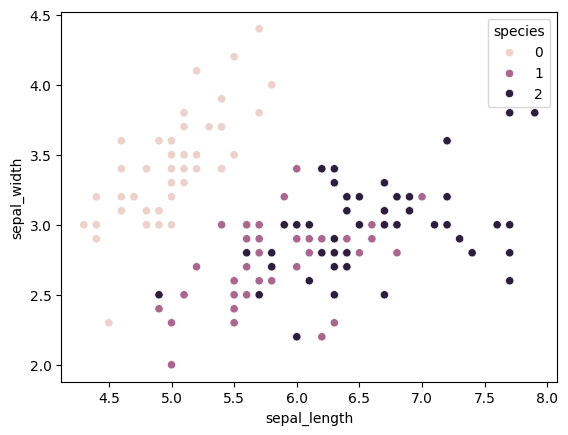

In [31]:
sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species");

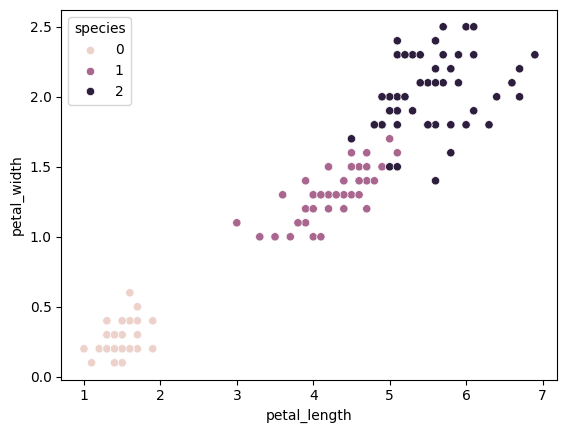

In [32]:
sns.scatterplot(data=df,x="petal_length",y="petal_width",hue="species");

In [35]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
 km=KMeans(n_clusters=k)
 km.fit(df[['petal_length']])
 sse.append(km.inertia_)

In [36]:
sse

[464.32540000000034,
 67.60373143196672,
 24.516431239935613,
 12.577511111111097,
 8.695215675310902,
 6.056805183413081,
 4.272091125541128,
 4.16998455667271,
 2.6326428044663337]

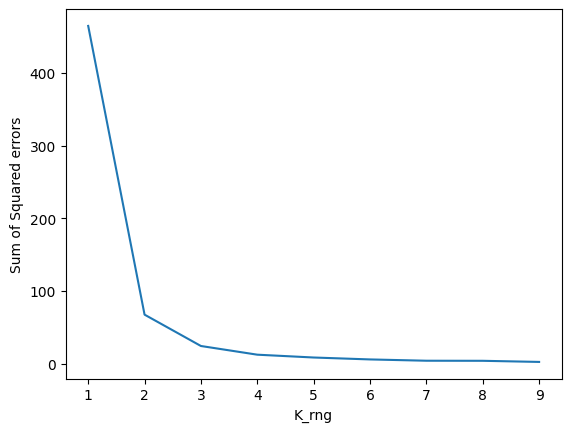

In [37]:
plt.xlabel('K_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng,sse)

In [38]:
km=KMeans(n_clusters=3,random_state=0,)
y_predicted=km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [39]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species,df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

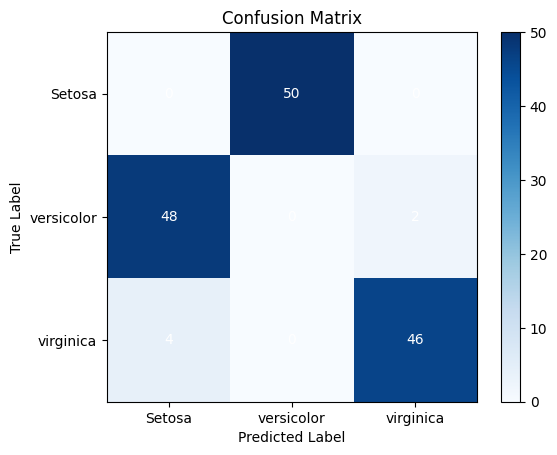

In [41]:
true_lables=df.species
predicted_lables=df.cluster

cm=confusion_matrix(true_lables,predicted_lables)
class_labels=['Setosa','versicolor','virginica']

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
for i in range(len(class_labels)):
  for j in range(len(class_labels)):
    plt.text(j,i,str(cm[i][j]),ha='center',va='center',color='white')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
